In [2]:
import pandas as pd

In [20]:
df_drink = pd.read_csv('시도구군별_음주운전_데이터_2005_2019.csv',header=[0], index_col=[0])
df_drink = df_drink.drop(['합계'])
df_drink.tail(5)

,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
전남,1375,1548,1475,1469,1585,1462,1354,1344,1325,1156,1176,904,905,908,793
전북,1045,1187,1152,1086,1283,1177,1083,1193,1003,882,920,753,772,683,579
제주,293,365,354,313,347,349,350,458,416,415,466,365,319,322,296
충남,1397,1562,1630,1646,1688,1783,1760,1782,1529,1411,1461,1203,1369,1308,1019
충북,779,987,1001,991,1027,986,1260,1233,1162,1035,1081,851,903,882,678


In [21]:
df_pop = pd.read_csv('행정구역_시군구별_인구수_2005_2019.csv', header=[0], index_col=[0])
df_pop = df_pop.drop(['합계'])
df_pop.tail(5)

,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
전남,1967205,1942925,1929836,1919000,1913004,1918485,1914339,1909618,1907172,1905780,1908996,1903914,1896424,1882970,1868745
전북,1885335,1868365,1862277,1855772,1854508,1868963,1874031,1873341,1872965,1871560,1869711,1864791,1854607,1836832,1818917
제주,557569,558496,559258,560618,562663,571255,576156,583713,593806,607346,624395,641597,657083,667191,670989
충남,1962646,1974433,1995531,2018537,2037582,2075514,2101284,2028777,2047631,2062273,2077649,2096727,2116770,2126282,2123709
충북,1488803,1494559,1506608,1519587,1527478,1549528,1562903,1565628,1572732,1578933,1583952,1591625,1594432,1599252,1600007


In [22]:
df_pop.shape

(17, 15)

In [23]:
row_list = []
for region, value in df_drink.iterrows():
#     print(value)
    for year, accident in dict(value).items():
        row_list.append({'음주운전':accident, '연도':year, '행정구역':region})

In [24]:
df_temp = pd.DataFrame(row_list)

In [25]:
df_temp

,음주운전,연도,행정구역
0,1297,2005,강원
1,1301,2006,강원
2,1268,2007,강원
3,1256,2008,강원
4,1401,2009,강원
...,...,...,...
250,1081,2015,충북
251,851,2016,충북
252,903,2017,충북
253,882,2018,충북


In [26]:
row_list = []
for region, value in df_pop.iterrows():
    for year, pop in dict(value).items():
        row_list.append({'인구수':pop, '연도':year, '행정구역':region})
df_temp2 = pd.DataFrame(row_list)
df_temp2

,인구수,연도,행정구역
0,1513110,2005,강원
1,1505420,2006,강원
2,1503806,2007,강원
3,1508575,2008,강원
4,1512870,2009,강원
...,...,...,...
250,1583952,2015,충북
251,1591625,2016,충북
252,1594432,2017,충북
253,1599252,2018,충북


In [28]:
df_heat = pd.merge(df_temp, df_temp2, on=['연도', '행정구역'])
df_heat

,음주운전,연도,행정구역,인구수
0,1297,2005,강원,1513110
1,1301,2006,강원,1505420
2,1268,2007,강원,1503806
3,1256,2008,강원,1508575
4,1401,2009,강원,1512870
...,...,...,...,...
250,1081,2015,충북,1583952
251,851,2016,충북,1591625
252,903,2017,충북,1594432
253,882,2018,충북,1599252


In [29]:
df_heat_origin = df_heat

In [32]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [97]:
df = pd.read_excel('시도별_등록외국인수_2005_2019.xls', header=[0], index_col=[0])
df

,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
강원,7989,10252,11994,12892,12672,13737,13332,12901,13409,14443,15108,15833,16949,18261,19069
경기,155942,200798,234030,256827,266808,285262,302447,288251,314715,352166,369665,373923,381628,408526,414318
경남,26679,35953,42389,51707,53222,57718,65960,64371,69126,77778,82316,81021,75136,74304,76123
경북,23409,29721,33721,35731,35350,36895,39984,40067,43499,47805,49765,51351,53364,56969,58119
광주,6361,8155,10016,11923,12188,13360,14106,14492,15557,17064,18455,19920,21279,22815,23825
대구,14530,17104,19409,19877,19406,20401,22014,21922,23302,25203,26141,26493,26442,28033,30191
대전,7897,9803,12177,14056,14485,14876,15047,14571,14798,15658,16416,17035,17431,18184,19109
부산,19547,23397,27662,31499,31310,32471,35116,35049,35943,38315,39991,41840,42837,45738,45999
서울,129660,175036,229072,255207,255749,262902,279220,247108,244410,266360,274957,273441,267153,283984,281876
세종,0,0,0,0,0,0,0,2360,2475,2730,3481,3745,4125,4940,5700


In [100]:
row_list = []
for region, value in df.iterrows():
    for year, forigner in dict(value).items():
        row_list.append({'등록외국인':forigner, '연도':year, '행정구역':region})
df_temp3 = pd.DataFrame(row_list)
df_temp3
df_heat = pd.merge(df_heat, df_temp3, on=['연도', '행정구역'])

In [103]:
df = pd.read_excel('시도별_재정자립도_2005_2019.xls', header=[0], index_col=[0])
df

,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
강원,27.5,26.7,28.3,28.2,28.0,27.1,27.5,26.9,26.6,26.6,25.9,27.1,29.1,28.7,28.6
경기,76.2,75.2,74.9,76.3,75.9,72.8,72.5,72.6,71.6,67.7,66.6,67.4,70.1,69.9,68.4
경남,37.5,38.8,39.1,39.4,39.4,42.9,42.6,43.3,41.7,42.4,43.3,43.5,45.0,44.7,40.5
경북,29.6,27.8,28.9,28.7,27.7,29.3,28.1,28.3,28.0,29.1,30.0,33.3,32.7,33.3,31.9
광주,60.6,57.5,54.2,52.6,48.3,47.5,47.5,46.6,45.4,46.0,49.3,51.5,49.2,49.0,46.8
대구,73.9,70.7,63.9,59.5,54.7,56.3,53.5,52.8,51.8,51.7,53.1,57.1,56.6,54.2,51.6
대전,75.0,72.8,72.1,66.4,59.3,56.3,57.2,58.3,57.5,54.9,54.9,55.0,57.1,54.4,48.2
부산,73.4,70.2,62.9,60.5,58.3,57.6,56.4,57.4,56.6,57.4,56.8,60.1,60.1,58.7,56.7
서울,96.1,94.3,90.5,88.3,92.0,85.8,90.3,90.2,88.8,84.2,84.3,84.7,85.0,84.3,82.2
세종,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,38.8,50.6,54.8,59.0,70.5,69.2,72.7


In [105]:
row_list = []
for region, value in df.iterrows():
    for year, independence in dict(value).items():
        row_list.append({'재정자립도':independence, '연도':year, '행정구역':region})
df_temp3 = pd.DataFrame(row_list)
df_temp3
df_heat = pd.merge(df_heat, df_temp3, on=['연도', '행정구역'])

In [108]:
df = pd.read_excel('숙박및음식점종사자수_2006_2018.xls', header=[0], index_col=[0])
df

,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018
강원,77332,78982,79328,81765,81008,82803,87813,90678,92554,91343,95219,99143,104485
경기,324397,340548,341231,349746,356053,376194,389016,409565,428925,440420,453998,471850,503155
경남,113555,116420,119213,121133,120946,126736,130319,136543,140785,141017,145843,147783,153097
경북,93968,95494,95671,95951,96364,98301,100954,105060,108617,109196,111419,112867,119131
광주,44706,46535,46103,46409,46535,47975,51432,53041,54157,55804,58203,59712,61476
대구,79543,82341,80002,81366,78210,82197,85301,88255,90692,90834,96657,97198,101342
대전,46653,47766,47932,48670,48606,51986,53537,56941,58490,60509,62009,63318,65647
부산,132724,131182,132693,132433,131036,136307,140763,145181,148084,148848,155207,157538,162889
서울,381829,390723,391062,401890,403256,416136,429913,442901,462331,479137,470397,474515,495092
세종,0,0,0,0,0,0,3589,4289,5749,7534,8356,9354,10997


In [113]:
row_list = []
for region, value in df.iterrows():
    for year, workers in dict(value).items():
        row_list.append({'숙박및음식점종사자수':workers, '연도':year, '행정구역':region})
df_temp3 = pd.DataFrame(row_list)
df_temp3
df_heat = pd.merge(df_heat, df_temp3, on=['연도', '행정구역'], how='outer')

In [34]:
df_heat.corr()

,음주운전,인구수
음주운전,1.000000,0.914513
인구수,0.914513,1.000000


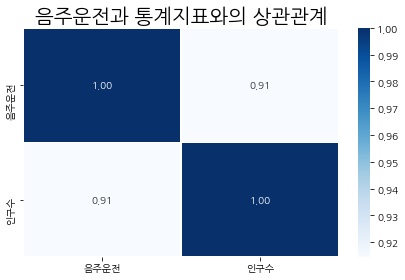

In [35]:
ax = sns.heatmap(df_heat.corr(), annot=True, 
fmt = '.2f', linewidths=.5, cmap='Blues')
plt.rcParams['font.family'] = 'NanumGothic'
plt.title('음주운전과 통계지표와의 상관관계', fontsize=20)
plt.tight_layout()
plt.savefig('음주운전과 통계지표와의 상관관계', dpi=199)